In [60]:
import torch
from data_loader import *

json_path = "D:\\LearningData/COCO2017/annotations/"
data_path = "D:\\LearningData/COCO2017/"
train_img_list, train_anno_list, val_img_list, val_anno_list = make_datapath_list(json_path=json_path,
                                                                                      data_path=data_path)

color_mean = (0.485, 0.456, 0.406)
color_std = (0.229, 0.224, 0.225)

train_dataset = VOCDataset(train_img_list, train_anno_list, phase="train",
                           transform=DataTransform(input_size=475, color_mean=color_mean, color_std=color_std))

val_dataset = VOCDataset(val_img_list, val_anno_list, phase="val",
                         transform=DataTransform(input_size=475, color_mean=color_mean, color_std=color_std))

# make Dataloader
batch_size = 4

train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataloader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

loading annotations into memory...
Done (t=19.83s)
creating index...
index created!
loading annotations into memory...
Done (t=0.62s)
creating index...
index created!


In [61]:
dataloader = iter(train_dataloader)
img, anno = dataloader.__next__()

In [62]:
import numpy as np
print(anno[0])

tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]], dtype=torch.uint8)


torch.Size([475, 475]) torch.Size([3, 475, 475])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


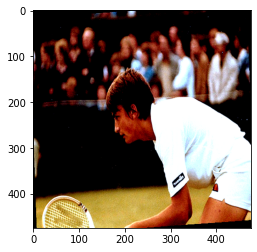

In [63]:
import matplotlib.pyplot as plt
from PIL import Image
import torchvision

print(anno[0].shape, img[0].shape)

anno_img = anno[0].numpy()
anno_img = anno_img * 255

anno_img = Image.fromarray(anno_img)
anno_img.show()

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(torchvision.utils.make_grid(img[0]))

In [64]:
anno = anno > 128

In [65]:
anno = anno[0].numpy()
anno_img = anno * 255

anno_img = Image.fromarray(anno_img)
anno_img.show()